<a href="https://colab.research.google.com/github/Alpeshpatel03434/Data-Science/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##   AIM : Decision Tree Algorithm

### Dataset :  Gender Classification

### Link :  https://www.kaggle.com/hb20007/gender-classification/download

### import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
# read csv file
gen_df = pd.read_csv("Gender.csv")
gen_df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


In [ ]:
gen_df.shape

(66, 5)

In [ ]:
gen_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


In [ ]:
gen_df.describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
count,66,66,66,66,66
unique,3,7,6,4,2
top,Cool,Rock,Doesn't drink,Coca Cola/Pepsi,F
freq,37,19,14,32,33


### Misiing value care

In [ ]:
# cheack missing value
gen_df.isna().sum()

Favorite Color          0
Favorite Music Genre    0
Favorite Beverage       0
Favorite Soft Drink     0
Gender                  0
dtype: int64

### Encoding catagorical variable

In [ ]:
gen_df.dtypes

Favorite Color          object
Favorite Music Genre    object
Favorite Beverage       object
Favorite Soft Drink     object
Gender                  object
dtype: object

In [ ]:
from sklearn import preprocessing

gen_df['Favorite Color'] = preprocessing.LabelEncoder().fit_transform(gen_df['Favorite Color'])
gen_df['Favorite Music Genre'] = preprocessing.LabelEncoder().fit_transform(gen_df['Favorite Music Genre'])
gen_df['Favorite Beverage'] = preprocessing.LabelEncoder().fit_transform(gen_df['Favorite Beverage'])
gen_df['Favorite Soft Drink'] = preprocessing.LabelEncoder().fit_transform(gen_df['Favorite Soft Drink'])
gen_df['Gender'] = preprocessing.LabelEncoder().fit_transform(gen_df['Gender'])

In [ ]:
gen_df.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,0,6,3,0,0
1,1,2,3,1,0
2,2,6,5,1,0
3,2,1,4,2,0
4,0,6,3,1,0


### Split dependent and independent data

In [ ]:
X = gen_df.iloc[:, :-1].values
y = gen_df.iloc[:, -1].values

In [ ]:
print(X)

[[0 6 3 0]
 [1 2 3 1]
 [2 6 5 1]
 [2 1 4 2]
 [0 6 3 1]
 [2 3 1 2]
 [0 4 0 1]
 [2 4 4 2]
 [2 6 2 0]
 [1 4 5 1]
 [0 4 2 0]
 [2 4 2 0]
 [2 4 5 0]
 [2 0 5 1]
 [0 6 0 1]
 [2 3 5 1]
 [0 4 5 0]
 [0 6 2 1]
 [0 6 2 1]
 [0 4 1 0]
 [0 4 0 2]
 [2 3 4 2]
 [0 6 3 1]
 [2 4 2 1]
 [0 1 4 0]
 [2 5 4 1]
 [0 4 0 3]
 [0 4 1 3]
 [0 4 1 1]
 [0 0 1 2]
 [2 6 2 1]
 [1 6 0 1]
 [0 5 0 1]
 [2 5 5 3]
 [1 2 0 0]
 [2 0 2 1]
 [1 6 1 1]
 [0 4 2 2]
 [0 4 4 2]
 [2 6 3 0]
 [0 6 3 1]
 [1 4 1 0]
 [2 5 1 1]
 [0 6 5 0]
 [0 1 0 3]
 [0 2 0 1]
 [0 2 5 1]
 [0 5 4 0]
 [0 6 1 3]
 [2 2 0 1]
 [0 5 1 1]
 [0 6 1 1]
 [0 2 1 3]
 [2 6 0 2]
 [0 0 1 2]
 [0 0 2 2]
 [2 1 2 2]
 [2 0 3 2]
 [2 3 3 1]
 [0 4 4 3]
 [0 0 4 1]
 [0 6 3 1]
 [0 2 0 1]
 [1 2 1 2]
 [0 6 5 1]
 [0 0 0 1]]


In [ ]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
print(X_train)

[[2 6 2 1]
 [0 4 2 0]
 [0 6 3 1]
 [1 4 1 0]
 [0 6 5 1]
 [0 5 0 1]
 [2 4 4 2]
 [0 6 0 1]
 [0 4 0 3]
 [0 4 1 3]
 [2 1 2 2]
 [2 5 1 1]
 [0 6 5 0]
 [0 0 4 1]
 [0 6 2 1]
 [0 2 0 1]
 [2 3 5 1]
 [2 3 1 2]
 [0 4 5 0]
 [0 4 0 2]
 [2 0 3 2]
 [2 6 2 0]
 [2 0 5 1]
 [2 5 4 1]
 [0 4 2 2]
 [0 6 2 1]
 [2 2 0 1]
 [0 2 1 3]
 [2 3 3 1]
 [0 4 4 2]
 [1 2 3 1]
 [2 4 5 0]
 [0 0 1 2]
 [0 1 4 0]
 [0 4 0 1]
 [2 4 2 1]
 [1 6 1 1]
 [0 5 1 1]
 [2 3 4 2]
 [0 4 1 0]
 [1 4 5 1]
 [2 6 3 0]
 [0 6 3 1]
 [0 4 4 3]
 [2 1 4 2]
 [0 6 3 0]
 [2 6 0 2]
 [0 5 4 0]
 [0 1 0 3]]


In [ ]:
print(y_train)

[0 0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1
 1 0 0 0 1 1 1 0 0 1 1 1]


In [ ]:
print(X_test)

[[0 2 0 1]
 [0 4 1 1]
 [0 0 1 2]
 [0 0 2 2]
 [1 2 1 2]
 [1 6 0 1]
 [0 6 1 1]
 [0 2 5 1]
 [1 2 0 0]
 [0 6 3 1]
 [2 0 2 1]
 [0 6 3 1]
 [2 5 5 3]
 [0 6 1 3]
 [0 0 0 1]
 [2 6 5 1]
 [2 4 2 0]]


In [ ]:
print(y_test)

[1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 0 0]


## Decision Tree Classification Model using train sat

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

## Predict test set using our Decision Tree Classification model

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
# test sat using pridicted
print(y_pred)

[1 0 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0]


##   Decision Trees

In [ ]:
from sklearn import tree

classifier_tree = tree.DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train, y_train)

In [ ]:
# text graph representaion
text_representation = tree.export_text(classifier_tree)
print(text_representation)

|--- feature_1 <= 2.50
|   |--- feature_2 <= 2.50
|   |   |--- class: 1
|   |--- feature_2 >  2.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- feature_2 <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  4.50
|   |   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|--- feature_1 >  2.50
|   |--- feature_1 <= 4.50
|   |   |--- feature_2 <= 4.50
|   |   |   |--- feature_2 <= 2.50
|   |   |   |   |--- feature_2 <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  0.50
|   |   |   |   |   |--- feature_0 <= 1.50
|   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |--- feature_2 <= 1.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_2 >  1.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 1.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_3 >  1.00
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |  

[Text(313.875, 826.2719999999999, 'X[1] <= 2.5\ngini = 0.495\nsamples = 49\nvalue = [27, 22]'),
 Text(83.7, 739.296, 'X[2] <= 2.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(41.85, 652.3199999999999, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(125.55000000000001, 652.3199999999999, 'X[1] <= 0.5\ngini = 0.444\nsamples = 6\nvalue = [4, 2]'),
 Text(83.7, 565.344, 'X[2] <= 4.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(41.85, 478.368, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(125.55000000000001, 478.368, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(167.4, 565.344, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(544.0500000000001, 739.296, 'X[1] <= 4.5\ngini = 0.47\nsamples = 37\nvalue = [23, 14]'),
 Text(334.8, 652.3199999999999, 'X[2] <= 4.5\ngini = 0.388\nsamples = 19\nvalue = [14, 5]'),
 Text(292.95, 565.344, 'X[2] <= 2.5\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(209.25, 478.368, 'X[2] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]')

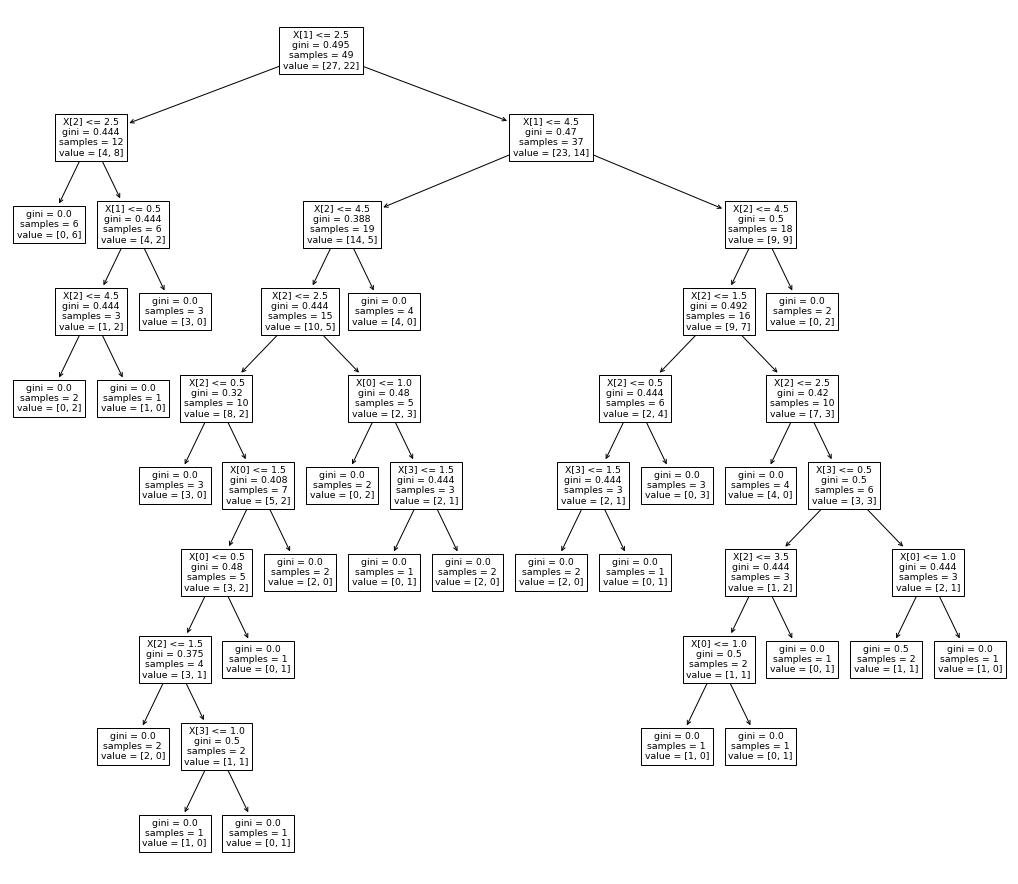

In [ ]:
# Decision Trees plot
plt.figure(figsize=(18, 16))
tree.plot_tree(classifier_tree) 

##  Model Measurements 

### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

CM = confusion_matrix(y_test, y_pred)
print(CM)

[[4 2]
 [2 9]]


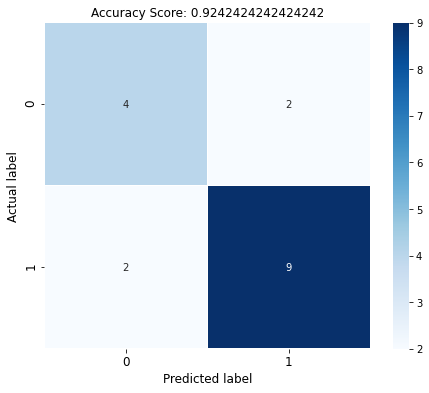

In [ ]:
# plot confusion matrix

score = classifier.score(X, y)

plt.figure(figsize=(8, 6))
sns.heatmap(CM, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Blues');
plt.ylabel('Actual label', fontsize = 12);
plt.xlabel('Predicted label', fontsize = 12);
plt.title('Accuracy Score: {}'.format(score), size = 12);
plt.tick_params(labelsize= 12)

###  Confusion Matrix TP,TN,FP,FN

In [ ]:
# True - negative, positive, False - Positive, negative
TN, FP, FN, TP = CM.ravel()

In [ ]:
print("True Positives(TP) = ", TP)

True Positives(TP) =  9


In [ ]:
print("True Negatives(TN) = ", TN)

True Negatives(TN) =  4


In [ ]:
print("False Positives(FP) = ", FP)

False Positives(FP) =  2


In [ ]:
print("False Negative(FN) = ", FN)

False Negative(FN) =  2


### Precision - Recall

In [ ]:
Precision = TP/ (TP + FP)

print("Precision = ", Precision)

Precision =  0.8181818181818182


In [ ]:
Recall = TP/ (TP + FN)

print("Recall = ", Recall)

Recall =  0.8181818181818182


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.82')

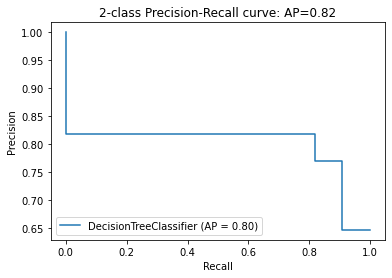

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(classifier, X_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: ' 'AP={0:0.2f}'.format(Precision))

### F1 - Score

In [ ]:
F1_Score = TP/ (TP + 0.5*(FP + FN)) 

print("F1 - Score = ", F1_Score)

F1 - Score =  0.8181818181818182


### The Optimal max_depth

### Accuracy Score

In [ ]:
Accuracy = (TP + TN)/(TP + TN + FP + FN)

print("Accuracy = ", Accuracy)

Accuracy =  0.7647058823529411


In [ ]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7647058823529411

In [ ]:
#  Logistic Regression our model Score

classifier.score(X, y)

0.9242424242424242

### Classification_report

In [ ]:
from sklearn import metrics

print (metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.82      0.82      0.82        11

    accuracy                           0.76        17
   macro avg       0.74      0.74      0.74        17
weighted avg       0.76      0.76      0.76        17



### Conclusion and Observations

#### Decision Trees is the process of the how to predict our classification model.     After Gender datasat Importing, Fit our dataset in our model, and test our model using predicted and Gender classify Male or Female with Accuracy is 0.74 percent.